In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns # nice color
import sklearn
from sklearn.mixture import GaussianMixture
import pystatsml.plot_utils
import pandas as pd
from sklearn import preprocessing

%matplotlib inline
%run visualization.py # CHEP FILE NAY DI CUNG
%run getdata.py # CHEP FILE NAY DI CUNG

colors = sns.color_palette()

##################################################################

# Get data de xu ly
dt = getData2('192.168.129.20', 27017,'social_acris')

#############################################
# Hien thi tat ca cac dong khi show data frame de check du lieu truoc
pd.set_option('display.max_rows', 1000)

#############################################
# delete all rows if they = 0
dtbo = dt[(dt.T != 0).any()]

# SET LAI CAC INDEX CHO DONG, tranh nhay coc index
dtbo = dtbo.reset_index(drop=True)

# CHUYEN QUA DANG SO THI MOI XY LY DUOC
dtbo[['countComments','valueBuyingOrSellingHomes']] =  dtbo[['countComments','valueBuyingOrSellingHomes']].apply(pd.to_numeric)

dtbo[['valueRealEstate','countPosts', 'countPastEvents','countGroups']] = dtbo[['valueRealEstate','countPosts', 'countPastEvents','countGroups']].apply(pd.to_numeric)

dtbo[['countTags' , 'valueHomeGarden', 'countPages', 'valueArchitects']] = dtbo[['countTags' , 'valueHomeGarden', 'countPages', 'valueArchitects']].apply(pd.to_numeric)

dtbo[['valueApartments', 'countLikes']] = dtbo[['valueApartments', 'countLikes']].apply(pd.to_numeric)

In [2]:
# XU LY GIA TRI THIEU CHO DATA FRAME, DIEN VAO MEAN CUA COT CHO CAC GIA TRI THIEU
missing = ~np.isfinite(dtbo)
mu = np.nanmean(dtbo, 0, keepdims=1)
X_hat = np.where(missing, mu, dtbo)
X_hat1 = pd.DataFrame(X_hat)

In [4]:
# CHON SO CUM MA CO BIC MIN

k = 20 

# Tao mang 18 phan tu de luu tu 2 - 19 cum 
bic = [0] * (k - 2)  # Chi so 0 - 17, 18 phan tu

# Tinh he so bic de chon so cum toi uu, nho nhat thi chon (tu 2 -> 19 cum)
for n_cluster in range(2, k):
    gmm = GaussianMixture(n_components=n_cluster, covariance_type='full')
    gmm.fit(X_hat1)
    bic[n_cluster - 2] = gmm.bic(X_hat1)

ndex_min = np.argmin(bic)
print("So cum toi uu la: ",ndex_min + 2)

So cum toi uu la:  7


In [5]:
# Phan tich Gauss voi so cum toi uu hoac truyen vao
################### BO TUONG DAY NE #########################
soCum = ndex_min + 2

gmm = GaussianMixture(n_components=soCum, covariance_type='diag')
gmm.fit(X_hat1)


GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=7, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
############## FINISH MODEL ##############################

In [120]:
print(gmm.weights_)
print("________")
print( gmm.means_.T)
print("JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ")
print( np.sqrt(gmm.covariances_).T)

[ 0.93984962  0.0075188   0.01503759  0.01503759  0.0075188   0.0075188
  0.0075188 ]
________
[[  0.25         0.           0.           0.           0.           2.
    0.        ]
 [  0.           0.           0.           0.           0.           0.
    0.        ]
 [  0.42276284   1.25852692   0.06486617   0.22891949   0.14095984
    0.97228181   0.42276284]
 [  0.           0.           0.           0.           0.           0.
    0.        ]
 [  0.33066667   1.           0.5          0.           0.           1.
    0.        ]
 [  0.23733333   0.           0.5          0.           0.           1.
    0.        ]
 [  0.28571429   1.           0.5          0.           0.           0.
    0.28571429]
 [  0.65262797   1.57001654   0.34892427   0.11176062   1.67176883
    0.40524062   0.65262797]
 [  7.375       31.           0.           3.          16.           6.
    0.        ]
 [  0.72289165   1.87343837   0.20551613   0.47227261   0.78341088
    1.04781481   0.72289165]
 

In [42]:
print(gmm1.weights_)
print("_________________________")
print(gmm1.means_.T)
print("JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ")
print(np.sqrt(gmm1.covariances_).T)

[ 0.24949595  0.24404866  0.25081629  0.2556391 ]
_________________________
[[-0.80494347 -0.01233208 -0.49645995  0.49975813]
 [ 0.2995346   0.00500537 -0.49496277  0.00104568]]
JJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ
[[ 0.09733636  0.15796625  0.10446122  0.10349975]
 [ 0.10050446  0.09988575  0.15764374  0.10148492]]


In [36]:
###### TEST ######

In [78]:
## Generate synthetic data
N = 1000 # number of points and dimenstinality
D = 2
if D == 2:
    #set gaussian ceters and covariances in 2D
    means = np.array([[0.5, 0.0],
                      [0, 0],
                      [-0.5, -0.5],
                      [-0.8, 0.3]])
    covs = np.array([np.diag([0.01, 0.01]),
                     np.diag([0.025, 0.01]),
                     np.diag([0.01, 0.025]),
                     np.diag([0.01, 0.01])])
elif D == 3:
    # set gaussian ceters and covariances in 3D
    means = np.array([[0.5, 0.0, 0.0],
                      [0.0, 0.0, 0.0],
                      [-0.5, -0.5, -0.5],
                      [-0.8, 0.3, 0.4]])
    covs = np.array([np.diag([0.01, 0.01, 0.03]),
                     np.diag([0.08, 0.01, 0.01]),
                     np.diag([0.01, 0.05, 0.01]),
                     np.diag([0.03, 0.07, 0.01])])
n_gaussians = means.shape[0]

In [101]:
points = []
for i in range(len(means)):
    x = np.random.multivariate_normal(means[i], covs[i], N )
    points.append(x)
points = np.concatenate(points)

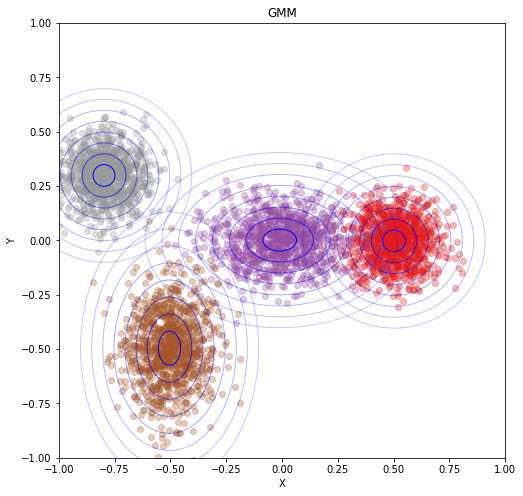

(12, 7)


In [106]:
gmm1 = GaussianMixture(n_components=4, covariance_type='diag')
gmm1.fit(points)
#'''
#visualize
if D == 2:
    visualize_2D_gmm(points, gmm1.weights_, gmm1.means_.T, np.sqrt(gmm1.covariances_).T)
elif D == 3:
    visualize_3d_gmm(points, gmm1.weights_, gmm1.means_.T, np.sqrt(gmm1.covariances_).T)
#'''

print(gmm.means_.T.shape)

In [52]:
arr = np.arange(10, dtype=float).reshape((2, 5))

In [59]:
print(arr)

[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]]


In [53]:
arr[0]

array([ 0.,  1.,  2.,  3.,  4.])

In [54]:
arr[0, 3]

3.0

In [55]:
arr[0][3]

3.0

In [56]:
arr[0, :]

array([ 0.,  1.,  2.,  3.,  4.])

In [57]:
arr[:, 0]

array([ 0.,  5.])

In [61]:
arr[0, :] # row 0: returns 1d array ([1, 2, 3, 4])
print(arr)
print(arr[:, 0] )# column 0: returns 1d array ([1, 5])
arr[:, :2] # columns strictly before index 2 (2 first columns)
arr[:, 2:] # columns after index 2 included
arr2 = arr[:, 1:4] # columns between index 1 (included) and 4 (excluded)
print(arr2)

[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]]
[ 0.  5.]
[[ 1.  2.  3.]
 [ 6.  7.  8.]]


In [63]:
arr = np.random.randint(0, 5, (10, 5))
print(arr)

[[2 0 2 1 3]
 [0 4 4 1 3]
 [1 3 3 2 1]
 [4 2 3 2 4]
 [2 3 1 1 3]
 [1 3 4 0 1]
 [2 1 0 2 1]
 [0 4 2 0 0]
 [0 2 2 1 3]
 [2 1 0 3 0]]


In [66]:
m = arr[:,[1,2,0]]
print(m)

[[0 2 2]
 [4 4 0]
 [3 3 1]
 [2 3 4]
 [3 1 2]
 [3 4 1]
 [1 0 2]
 [4 2 0]
 [2 2 0]
 [1 0 2]]


In [8]:
dt = getData('192.168.129.20', 27017)

In [15]:
# delete all rows if they = 0
dtbo = dt[(dt.T != 0).any()]

# SET LAI CAC INDEX CHO DONG
dtbo = dtbo.reset_index(drop=True)


In [10]:
# XU LY GIA TRI THIEU CHO DATA FRAME, DIEN VAO MEAN CUA COT CHO CAC GIA TRI THIEU
missing = ~np.isfinite(dtbo)
mu = np.nanmean(dtbo, 0, keepdims=1)
X_hat = np.where(missing, mu, dtbo)
X_hat1 = pd.DataFrame(X_hat)

In [17]:
k = 20 

# Tao mang 18 phan tu de luu tu 2 - 19 cum 
bic = [0] * (k - 2)  # Chi so 0 - 17, 18 phan tu

# Tinh he so bic de chon so cum toi uu, nho nhat thi chon (tu 2 -> 19 cum)
for n_cluster in range(2, k):
    gmm = GaussianMixture(n_components=n_cluster, covariance_type='full')
    gmm.fit(X_hat1)
    bic[n_cluster - 2] = gmm.bic(X_hat1)

ndex_min = np.argmin(bic)
print("So cum toi uu la: ",ndex_min + 2)

So cum toi uu la:  17
